# Problem 4: Fixed points and stability

Given: the dynamical system $$\frac{dx}{dt} = \sin(x)$$

# a.
To Plot: the Right Hand Side of the function and find the fixed points of the function.

Ans. 
Let $F(x) = \sin(x)$ <br>
The fixed points are those values of x for which F(x) = 0 <br>
$\therefore \forall x = n\pi,  F(x) = 0$

In [1]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.integrate import odeint

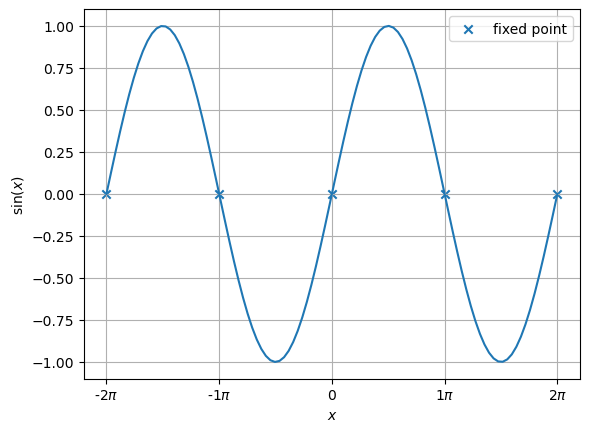

In [2]:
def func(x, t):
    dxdt = np.sin(x)
    return dxdt

t = 0
x = np.linspace(-2*np.pi, 2*np.pi, 100)

fig, ax = plt.subplots()

plt.plot(x, func(x, 0))
plt.scatter([i*np.pi for i in range(-2, 3)], [func(i*np.pi, t) for i in range(-2, 3)], marker = "x", label = "fixed point")

ax.set_xlabel("$x$")
ax.set_ylabel("$\sin(x)$")
ax.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))


ax.legend()
ax.grid()

# b. 
To Check: whether $x_1^* = 0$ and $x_2^*=\pi$ are stable or unstable fixed points

In [3]:
# Model has been already defined in part a as func(x, t)

# Choosing a small perturbation around the stable point
perturb = [0.0001*i for i in np.arange(1, 10000, 1000)]


Text(0.5, 1.0, 'Trajectory for perturbation from $x_1* = 0$')

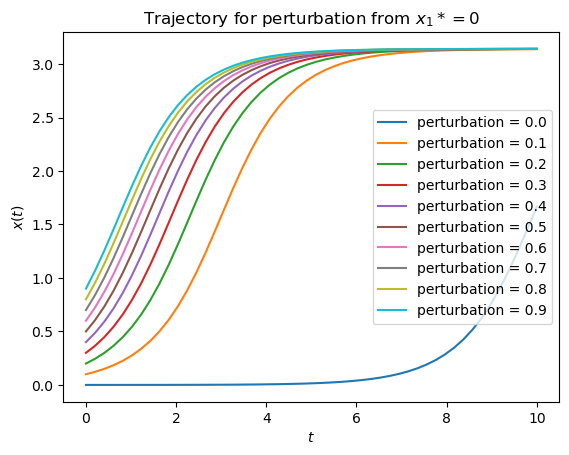

In [4]:
# Checking if x = 0 is stable or unstable
point  = 0

# Setting the initial condition
x0 = [point + perturb[i] for i in range(len(perturb))]

# Setting the time axis
t = np.linspace(0, 10)

# Finding the trajectory of the particle w.r.t time
x = [odeint(func, x0[i], t) for i in range(len(perturb))]

fig1, ax = plt.subplots()

for i in range(len(perturb)):
    plt.plot(t, x[i], label = "perturbation = %.1f" %perturb[i])

ax.legend(loc = "best")
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
plt.title("Trajectory for perturbation from $x_1* = 0$")

Trajectory diverges from $x_1^* = 0$
$\implies x_1^* = 0$ is an unstable point

Text(0.5, 1.0, 'Trajectory for perturbation from $x_2* = \\pi$')

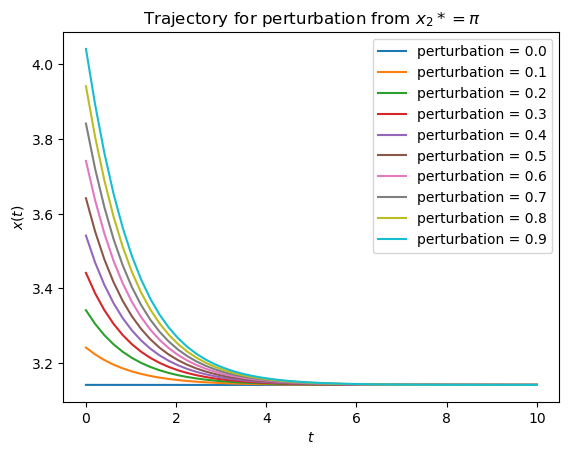

In [5]:

# Checking if x = pi is stable or unstable
point  = np.pi

# Setting the initial condition
x0 = [point + perturb[i] for i in range(len(perturb))]

# Setting the time axis
t = np.linspace(0, 10)

# Finding the trajectory of the particle w.r.t time
x = [odeint(func, x0[i], t) for i in range(len(perturb))]

fig1, ax = plt.subplots()

for i in range(len(perturb)):
    plt.plot(t, x[i], label = "perturbation = %.1f" %perturb[i])

ax.legend(loc = "best")
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
plt.title("Trajectory for perturbation from $x_2* = \pi$")

Trajectory converges to $x_2^* = \pi$
$\implies x_2^* = \pi$ is a stable point

# c. 
To generalise: Stability property for all fixed points of the system



Text(0.5, 1.0, 'Trajectory for perturbation from $x_{even}*$')

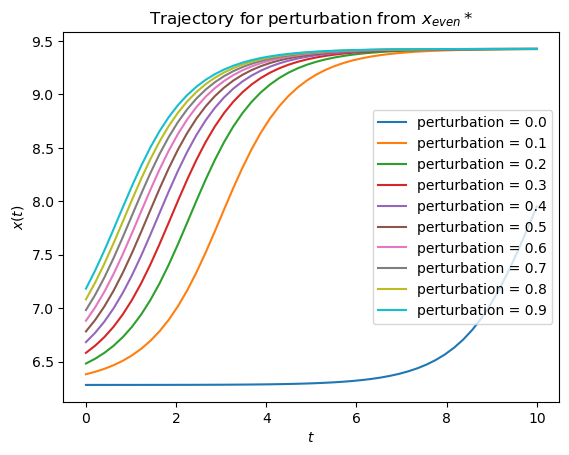

In [6]:
# Checking for x = 2pi as a particular case for even integers of pi as a fixed point

point  = 2*np.pi

# Setting the initial condition
x0 = [point + perturb[i] for i in range(len(perturb))]

# Setting the time axis
t = np.linspace(0, 10)

# Finding the trajectory of the particle w.r.t time
x = [odeint(func, x0[i], t) for i in range(len(perturb))]

fig1, ax = plt.subplots()

for i in range(len(perturb)):
    plt.plot(t, x[i], label = "perturbation = %.1f" %perturb[i])

ax.legend(loc = "best")
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
plt.title("Trajectory for perturbation from $x_{even}*$")

Text(0.5, 1.0, 'Trajectory for perturbation from $x_{odd}*$')

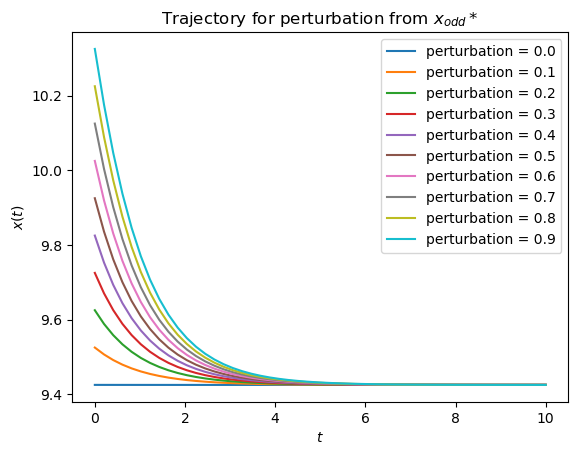

In [7]:
# Checking for x = 3pi as a particular case for odd integers of pi as a fixed point

point  = 3*np.pi

# Setting the initial condition
x0 = [point + perturb[i] for i in range(len(perturb))]

# Setting the time axis
t = np.linspace(0, 10)

# Finding the trajectory of the particle w.r.t time
x = [odeint(func, x0[i], t) for i in range(len(perturb))]

fig1, ax = plt.subplots()

for i in range(len(perturb)):
    plt.plot(t, x[i], label = "perturbation = %.1f" %perturb[i])

ax.legend(loc = "best")
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
plt.title("Trajectory for perturbation from $x_{odd}*$")

### Since it can be seen from the plots that the trajectories converge for odd integral multiples of $\pi$ and diverges for even integral multiples of $\pi$, we can safely assume that the odd multiples represent stable fixed points and vice versa.

# d.
To comment: on the fixed points of $$\frac{dx}{dt} = \sin(x) + c$$, where $c$ is a constant. <br>
To check: the behaviour of fixed points and their stability if $c \in (-1, 1)$ and if $c \in (-\infty, -1) \cup(1, \infty)$

Ans. 
Let $F_1(x) = \sin(x) + c$ <br>
The fixed points are those values of x for which $F_1(x) = 0$ <br>
$\therefore \forall x = -\sin^{-1}(c),  F_1(x) = 0$ <br>
$\therefore$ Fixed points ONLY exist when $c \in (-1, 1)$.

Text(0.5, 1.0, 'Trajectory for perturbation from $x*$ = -0.682 and c = 0.630')

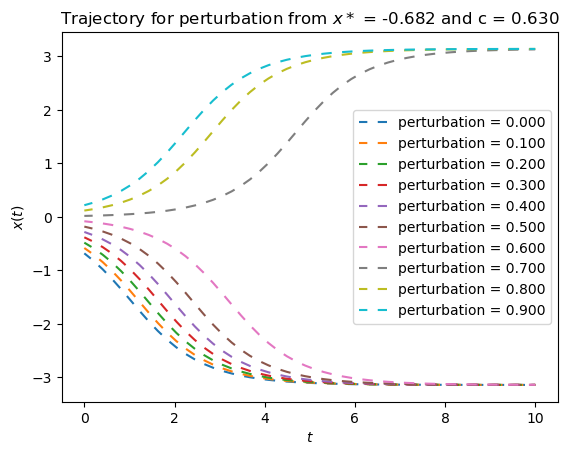

In [8]:
# Solving the system for a random value of c in -1 to 1

import random

# Choosing a random number between -1 and 1
c = round(random.uniform(-1, 1), 2)

def func2(x, t):
    dxdt = np.sin(x) + c
    return dxdt

perturb = [0.0001*i for i in np.arange(1, 10000, 1000)]
point  = -np.arcsin(c)

# Setting the initial condition
x0 = [point + perturb[i] for i in range(len(perturb))]

# Setting the time axis
t = np.linspace(0, 10)

# Finding the trajectory of the particle w.r.t time
x = [odeint(func, x0[i], t) for i in range(len(perturb))]

fig1, ax = plt.subplots()

for i in range(len(perturb)):
    plt.plot(t, x[i], label = "perturbation = %.3f" %perturb[i], linestyle=(1, (5, 5)))

ax.legend(loc = "best")
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
plt.title("Trajectory for perturbation from $x*$ = %.3f " %point + "and c = %.3f" %c)

From the graphs, it can be easily seen that the trajectory never converges to the fixed point.
$\implies$ The fixed points are never stable when a constant $\in (-1, 1)$ is added to the RIght Hand Side of the Differential Equation.

This can also be seen analytically from the theory of stability:
$\frac{dF_1}{dx} = \cos(x)$ <br>
$\implies \left(\frac{dF_1}{dx}\right)_{x^*} = \cos(x*) = \cos(-\sin^{-1}(c)) = \cos(\sin^{-1}(c)) = \sqrt{1 - c^2}$ <br>

Now $\forall c \in (-1, 1), \left(\frac{dF_1}{dx}\right)_{x^*} > 0$. <br>
$\therefore$  The system is never stable at the fixed points.



if $|c| > 1$, then the system has NO fixed points as no solutions exist for $$x = -\sin^{-1}(c)$$ 